In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
import seaborn as sns
from scipy.stats import median_abs_deviation

#pd.options.display.float_format = '{:.2f}'.format

from model_SARIMA import *
from model_naiv import *
from test_mean import *
from test_correlation import *
from cross_validation import *

warnings.filterwarnings("ignore")

/Users/alex/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Datensatz lesen

In [2]:
df = pd.read_csv('Walmart_Sales.csv', parse_dates=['Date'], dayfirst=True)
df.columns = df.columns.str.lower()

actual_values_dict = {}

for store in range(1, 46):
    store_df = df[df['store'] == store].copy()
    store_df.sort_values('date', inplace=True)
    store_df.set_index('date', inplace=True)

    actual_values_dict[store] = store_df['weekly_sales']

Modell wählen

In [3]:
model_type = 'SARIMA'
#model_type = 'Naive'

Alle Residuen und Fitted Values berechnen

In [4]:
fitted_values_dict = {}
residuals_dict = {}

if model_type == 'Naive':
    residuals_dict, fitted_values_dict = naive_for_all_stores('Walmart_Sales.csv')

if model_type == 'SARIMA':
    sarima_models = SARIMA_for_all_stores('Walmart_Sales.csv', whichorder = 5)


Store 1: Modell erstellt mit Order (1, 1, 1) und Seasonal Order (1, 0, 0, 52)
Store 2: Modell erstellt mit Order (4, 0, 3) und Seasonal Order (1, 0, 1, 52)
Store 3: Modell erstellt mit Order (1, 1, 1) und Seasonal Order (2, 0, 0, 52)
Store 4: Modell erstellt mit Order (2, 1, 1) und Seasonal Order (1, 0, 0, 52)
Store 5: Modell erstellt mit Order (1, 1, 1) und Seasonal Order (1, 0, 0, 52)
Store 6: Modell erstellt mit Order (2, 0, 2) und Seasonal Order (1, 0, 0, 52)
Store 7: Modell erstellt mit Order (0, 1, 1) und Seasonal Order (0, 1, 0, 52)
Store 8: Modell erstellt mit Order (2, 0, 2) und Seasonal Order (1, 0, 0, 52)
Store 9: Modell erstellt mit Order (1, 1, 1) und Seasonal Order (1, 0, 0, 52)
Store 10: Modell erstellt mit Order (4, 0, 2) und Seasonal Order (1, 0, 0, 52)
Store 11: Modell erstellt mit Order (2, 0, 2) und Seasonal Order (1, 0, 0, 52)
Store 12: Modell erstellt mit Order (2, 0, 2) und Seasonal Order (1, 0, 0, 52)
Store 13: Modell erstellt mit Order (2, 0, 2) und Seasonal Or

In [5]:
if model_type == 'SARIMA':
    for store in range(1, 46):
        model = sarima_models.get(store)
        fitted_values_dict[store] = model.fittedvalues.iloc[52:] # erste 52 Werte entfernen
        residuals_dict[store] = model.resid.iloc[52:] # erste 52 Werte entfernen


#pd.set_option('display.max_rows', None)
#print(residuals_dict[1])
print(len(residuals_dict[1]))
print(len(fitted_values_dict[1]))

91
91


Residuen

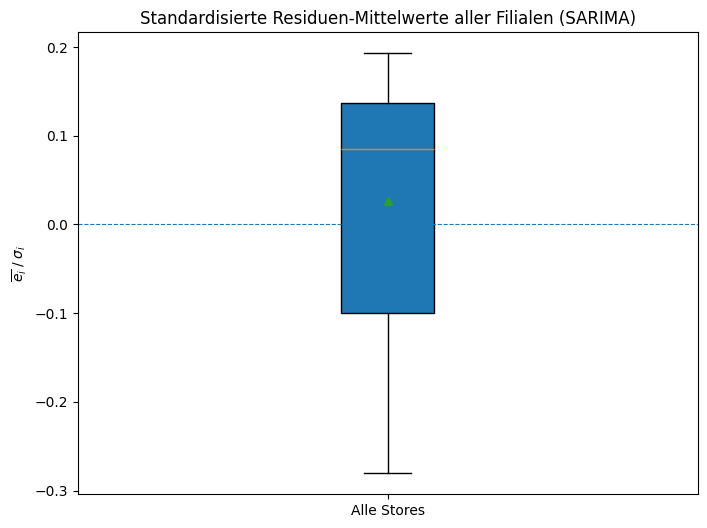

[-0.1494412708324942, 0.09330641388708093, -0.12171541005813759, -0.17812921752790647, -0.10993779320839625, 0.16595322879325117, -0.1151761932262965, 0.1686452929077035, -0.1499185329808553, 0.13983308132684388, 0.138579581839848, 0.19298541312878476, 0.17701170312292605, -0.28053869960720373, 0.17614002321556288, 0.1372928156697791, -0.11098136024245206, 0.1281248579339643, 0.11314488538212059, 0.10030763893048905, -0.172671563286633, 0.1525978029112963, 0.09280555138149249, 0.10851038656738177, 0.13398706792877108, 0.12544365881875022, 0.08533469972024481, 0.03793342319043336, 0.1572994459696963, -0.054946177869815246, 0.13593151034052894, 0.14995370271210223, 0.011279103005747833, 0.08216550822853562, -0.022497160203419905, -0.11003298412406677, -0.048155336071994605, -0.10018383831036046, -0.07877476204894211, 0.12085357199367772, -0.13497687315936568, -0.10023841785777342, -0.055243428240579796, -0.0014641267798153168, 0.15580875818621026]
Mittelwert:  0.026360132921260326
Median

In [6]:
resid_bias = [] 
for store in sorted(residuals_dict.keys(), key=int):
    resid = residuals_dict[store]
    mean = resid.mean()
    std = resid.std(ddof=0)        # Populations-Std (ddof=0)
    if std == 0:
        resid_bias.append(np.nan)
    else:
        resid_bias.append(mean / std) # standardisierter Bias

# Erstelle den Boxplot der Mittelwerte
plt.figure(figsize=(8, 6))
plt.boxplot(resid_bias, patch_artist=True, showmeans=True)
plt.title('Standardisierte Residuen-Mittelwerte aller Filialen ({})'.format(model_type))
plt.ylabel(r'$\overline{e_i}\; / \;\sigma_i$')
plt.xticks([1], ["Alle Stores"])
plt.axhline(0, ls='--', lw=0.8)
plt.show()

print(resid_bias)
print("Mittelwert: ", np.mean(resid_bias))
print("Median: ", np.median(resid_bias))

Korrelations Tests

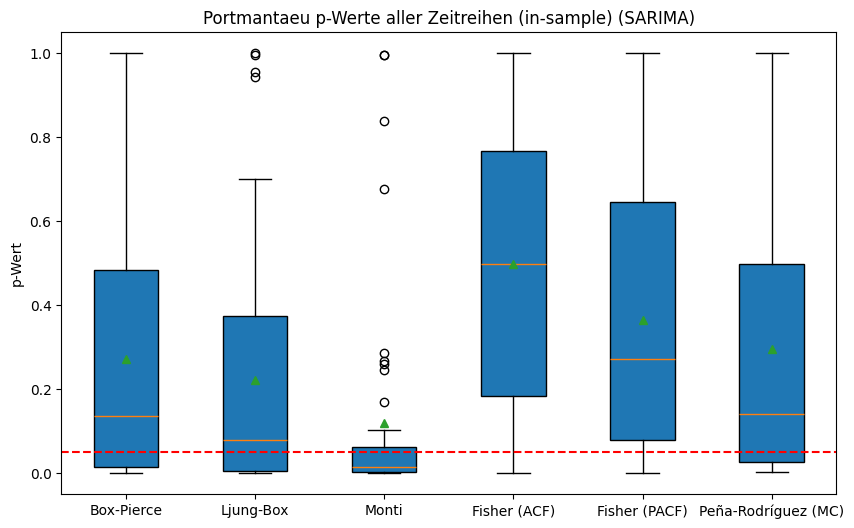

Mittelwerte: 0.2707753204929432 0.22201518381972096 0.1184831095067418 0.4963367842193606 0.3627884122299945 0.29397269397269393
Mediane: 0.13488335122470832 0.07727622369098446 0.013283590851679516 0.4963988062685142 0.2706551736523186 0.13986013986013987


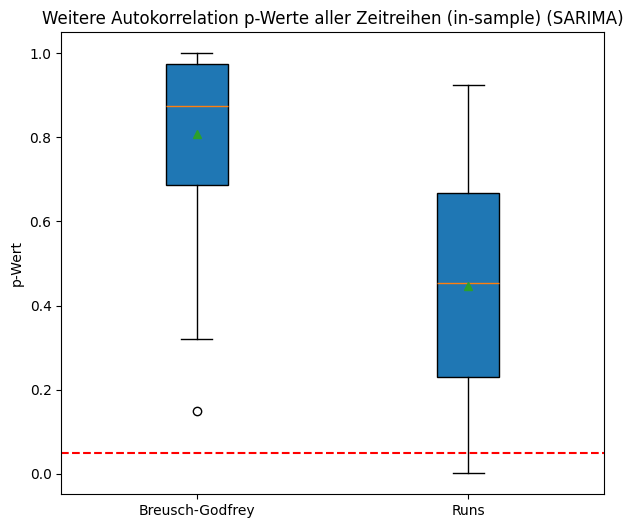

Mittelwerte: 0.8086067646887904 0.44582083193946337
Mediane: 0.873661497227636 0.45376112005963876


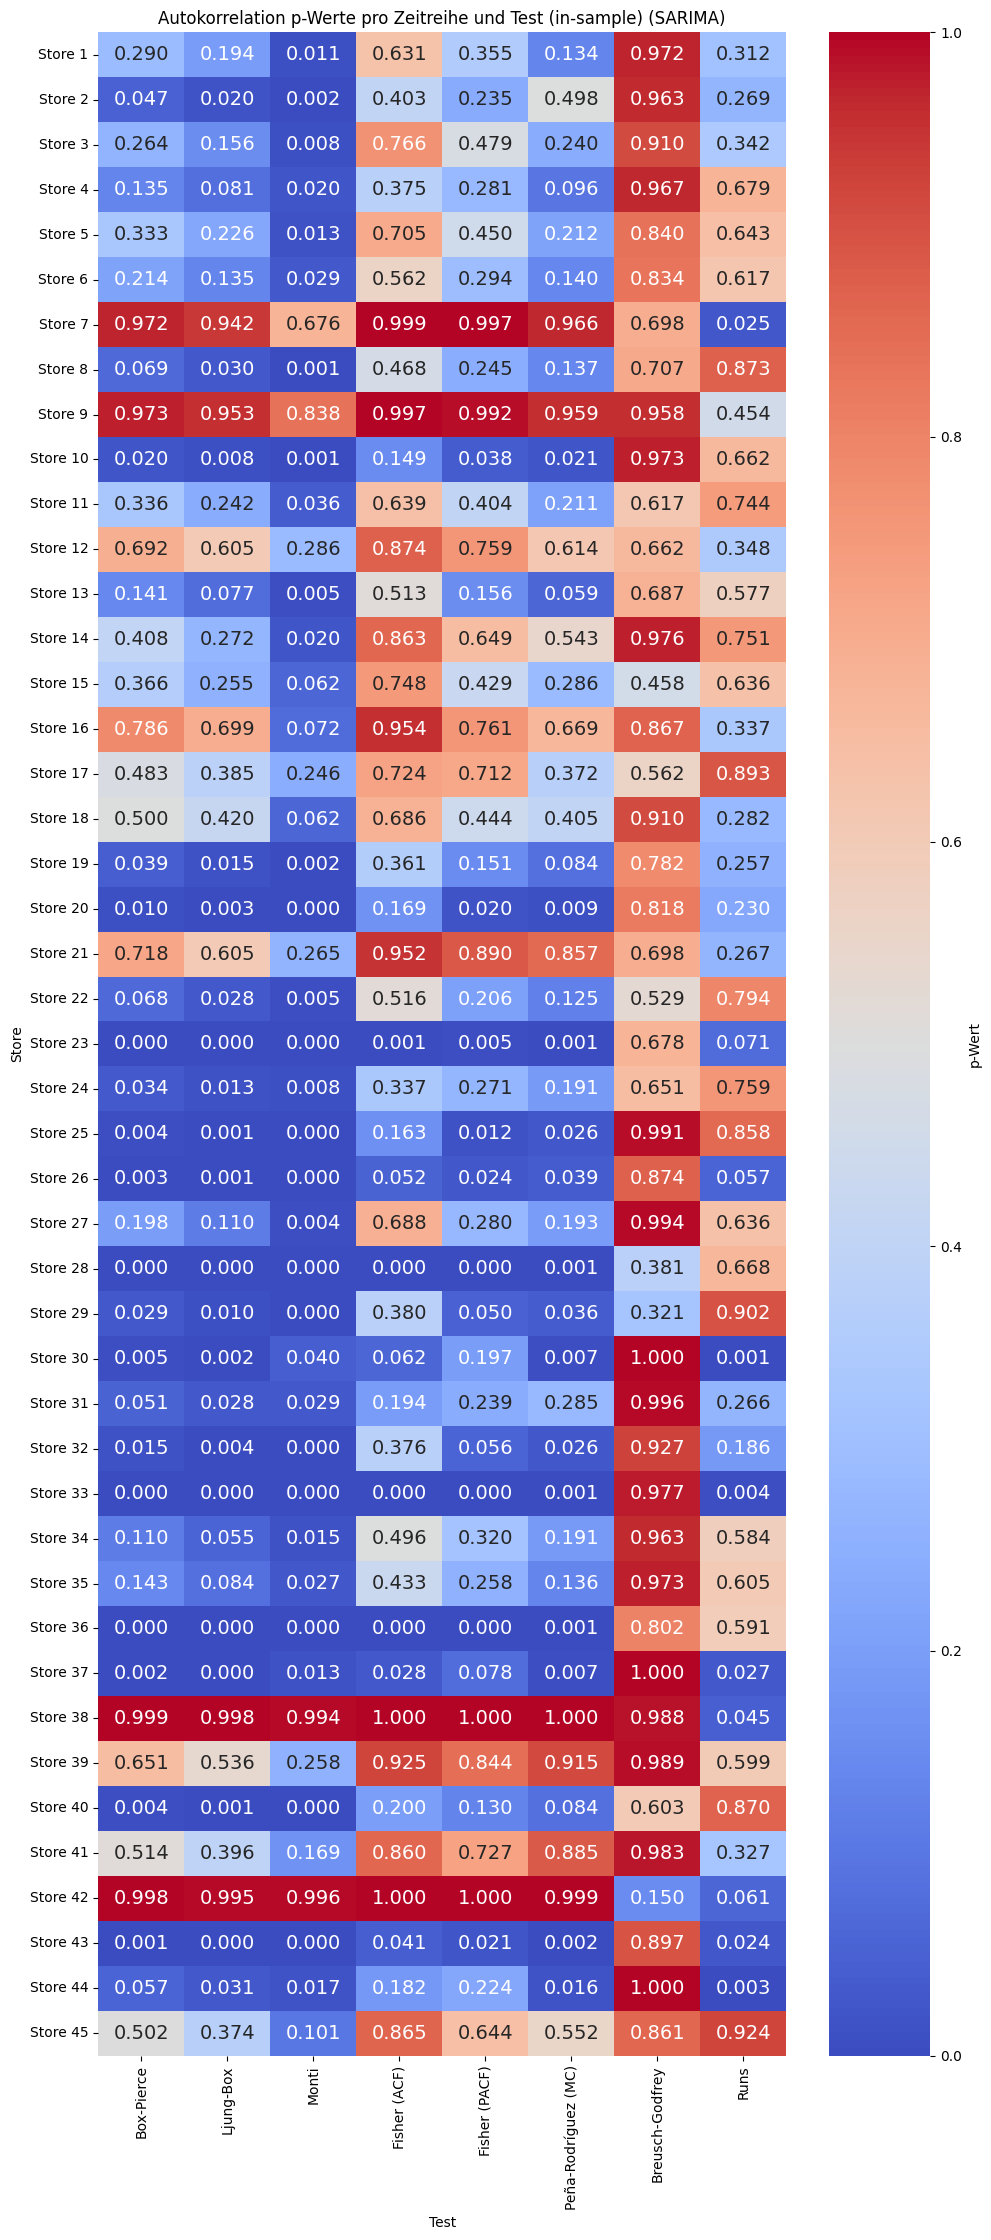

In [7]:
bp_pvalues = []
lb_pvalues = []
bg_pvalues = []
rt_pvalues = []
m_pvalues = []
f_pvalues = []
f2_pvalues = []
pr2_pvalues = []

# Für jeden Store von 1 bis 45:
for store in range(1, 46):
    resid = residuals_dict.get(store) #Residuen für den Store

    sales = df[df['store'] == store].copy() #Zeitreihe für den Store
    sales.set_index('date', inplace=True)
    sales = sales['weekly_sales']
    sales = sales.asfreq('W-FRI')

    if resid is not None:
        # Box-Pierce Test
        try:
            _, p_value = box_pierce_test(residuals = resid, store_num = store, model = model_type, sample = "IS", lags = 18, print_results=False)
            bp_pvalues.append(p_value)
        except Exception as e:
            print(f"Fehler beim Box-Pierce Test für Store {store}: {e}")
            bp_pvalues.append(np.nan)
        # Ljung-Box Test
        try:
            _, p_value = ljung_box_test(residuals = resid, store_num = store, model = model_type, sample = "IS", lags=18, print_results = False)
            lb_pvalues.append(p_value)
        except Exception as e:
            print(f"Fehler beim Ljung-Box Test für Store {store}: {e}")
            lb_pvalues.append(np.nan)
        # Breusch-Godfrey Test
        try:
            if model_type == 'SARIMA':
                _, p_value = breusch_godfrey_test(model = sarima_models[store], lags = 18, print_results = False)
            if model_type == 'Naive':
                _, p_value = breusch_godfrey_test_naive(sales, lags = 5, print_results = False)
            bg_pvalues.append(p_value)
        except Exception as e:
            print(f"Fehler beim Breusch-Godfrey Test für Store {store}: {e}")
            bg_pvalues.append(np.nan)
        # Monti Test
        try:
            _, p_value = monti_test(residuals = resid, store_num=store, model = model_type, m = 18, print_results = False)
            m_pvalues.append(p_value)
        except Exception as e:
            print(f"Fehler beim Monti Test für Store {store}: {e}")
            m_pvalues.append(np.nan)
        # Fisher Test (ACF)
        try:
            _, p_value = fisher_test(residuals = resid, store_num = store, model = model_type, version = "acf", m = 18, print_results = False)
            f_pvalues.append(p_value)
        except Exception as e:
            print(f"Fehler beim Fisher Test für Store {store}: {e}")
            f_pvalues.append(np.nan)
        # Fisher Test (PACF)
        try:
            _, p_value = fisher_test(residuals = resid, store_num = store, model = model_type, version = "pacf", m = 18, print_results = False)
            f2_pvalues.append(p_value)
        except Exception as e:
            print(f"Fehler beim Fisher Test für Store {store}: {e}")
            f2_pvalues.append(np.nan)
        # Pena Rodriguez Test (Monte Carlo)
        try:
            _, p_value = pena_rodriguez_test_mc(residuals = resid, m = 18, print_results= False)
            pr2_pvalues.append(p_value)

        except Exception as e:
            print(f"Fehler beim Pena Rodriguez Test für Store {store}: {e}")
            pr2_pvalues.append(np.nan)

        # Runs Test
        try:
            _, p_value = run_test(residuals = resid, print_results = False)
            rt_pvalues.append(p_value)
        except Exception as e:
            print(f"Fehler beim Runs Test für Store {store}: {e}")
            rt_pvalues.append(np.nan)
    else:
        bp_pvalues.append(np.nan)
        lb_pvalues.append(np.nan)
        bg_pvalues.append(np.nan)
        rt_pvalues.append(np.nan)
        m_pvalues.append(np.nan)
        f_pvalues.append(np.nan)
        f2_pvalues.append(np.nan)
        pr2_pvalues.append(np.nan)



pvalues = np.column_stack([bp_pvalues, lb_pvalues, m_pvalues, f_pvalues, f2_pvalues, pr2_pvalues, bg_pvalues, rt_pvalues])
pvalues_portmantaeu = np.column_stack([bp_pvalues, lb_pvalues, m_pvalues, f_pvalues, f2_pvalues, pr2_pvalues])
pvalues_other = np.column_stack([bg_pvalues, rt_pvalues])


# Boxplot Portmanteau
plt.figure(figsize=(10, 6))
plt.boxplot(pvalues_portmantaeu, patch_artist=True, showmeans=True)
plt.title('Portmantaeu p-Werte aller Zeitreihen (in-sample) ({})'.format(model_type))
plt.ylabel("p-Wert")
plt.xticks([1, 2, 3, 4, 5, 6], ["Box-Pierce", "Ljung-Box",  "Monti", "Fisher (ACF)", "Fisher (PACF)", "Peña-Rodríguez (MC)"])
plt.axhline(0.05, color='red', linestyle='--', label='Signifikanzniveau 0.05')
plt.show()

# Mittelwerte und Median der p-Werte
print("Mittelwerte:", np.mean(bp_pvalues), np.mean(lb_pvalues),  np.mean(m_pvalues), np.mean(f_pvalues), np.mean(f2_pvalues), np.mean(pr2_pvalues))
print("Mediane:", np.median(bp_pvalues), np.median(lb_pvalues),  np.median(m_pvalues), np.median(f_pvalues), np.median(f2_pvalues), np.median(pr2_pvalues))

# Boxplot Breusch-Godfrey und Runs-Test
plt.figure(figsize=(7, 6))
plt.boxplot(pvalues_other, patch_artist=True, showmeans=True, widths=[0.23, 0.23])
plt.title('Weitere Autokorrelation p-Werte aller Zeitreihen (in-sample) ({})'.format(model_type))
plt.ylabel("p-Wert")
plt.xticks([1, 2], ["Breusch-Godfrey", "Runs"])
plt.axhline(0.05, color='red', linestyle='--', label='Signifikanzniveau 0.05')
plt.show()

# Mittelwerte und Median der p-Werte
print("Mittelwerte:", np.mean(bg_pvalues), np.mean(rt_pvalues))
print("Mediane:", np.median(bg_pvalues), np.median(rt_pvalues))


# Heatmap
store_names = [f"Store {i+1}" for i in range(pvalues.shape[0])]
columns = ["Box-Pierce", "Ljung-Box",  "Monti", "Fisher (ACF)", "Fisher (PACF)", "Peña-Rodríguez (MC)", "Breusch-Godfrey", "Runs"]
df_pvalues = pd.DataFrame(pvalues, index=store_names, columns=columns)
plt.figure(figsize=(10, len(store_names) * 0.5))  # Dynamische Höhe
sns.heatmap(df_pvalues, annot=True, fmt=".3f", annot_kws={"size": 14}, cmap="coolwarm", cbar_kws={'label': 'p-Wert'}, vmin=0, vmax=1)
plt.title('Autokorrelation p-Werte pro Zeitreihe und Test (in-sample) ({})'.format(model_type))
plt.xlabel("Test")
plt.ylabel("Store")
plt.tight_layout()
plt.show()





Durbin Watson

[2.0617706458609018, 2.2549570914979613, 2.1505788665041607, 2.028892058310495, 1.8047918170397264, 1.9243938941047645, 1.3459682984930939, 1.63035020494066, 1.8598802936357313, 2.216265862974998, 1.7389278155374805, 1.5714660531544469, 1.8815690075297613, 1.7611548609928498, 2.0174648569338673, 2.0332234218072536, 1.5227921854848552, 2.38539483097851, 1.9110704934906566, 1.8317591065645376, 1.9098043812198287, 2.1906576795308816, 2.5316038047702394, 2.0147978794539614, 2.162920936760812, 2.1504554635686923, 2.084048389685444, 2.182949654567403, 2.08072016836637, 2.6847137790060414, 2.1930639834807706, 1.9181952549798182, 2.964784667401916, 2.1388415770099543, 1.8099122274134354, 2.3287956947312303, 2.7553724215890076, 1.4275531391833818, 1.7960469232412128, 2.0478127886866573, 1.6363245477204165, 1.2186294503210886, 2.562827310313722, 2.581676900891106, 1.8590874490579898]


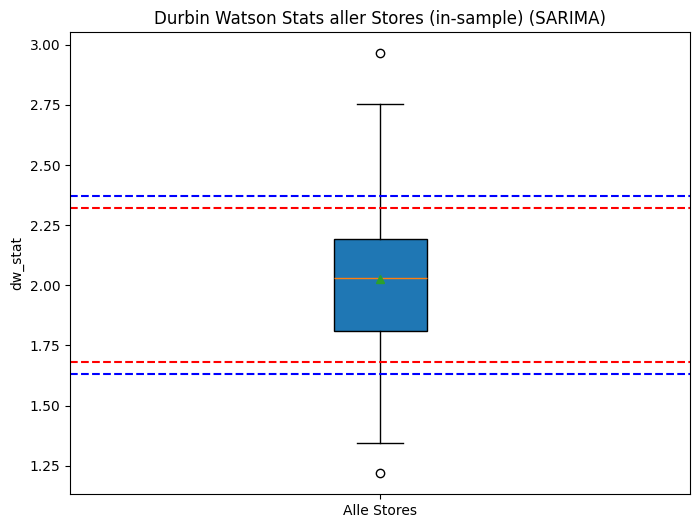

Mittelwert: 2.0258726253064028
Median: 2.028892058310495


In [8]:
dw_stats = []

# Für jeden Store von 1 bis 45:
for store in range(1, 46):
    resid = residuals_dict.get(store)
    if resid is not None:
        try:
            dw_stat = durbin_watson_test(resid, False)
            dw_stats.append(dw_stat)
        except Exception as e:
            print(f"Fehler beim Durbin Watson Test für Store {store}: {e}")
            dw_stats.append(np.nan)
    else:
        dw_stats.append(np.nan)

print(dw_stats)

# Erstelle einen Boxplot der p-Werte
plt.figure(figsize=(8, 6))
plt.boxplot(dw_stats, patch_artist=True, showmeans=True)
plt.title('Durbin Watson Stats aller Stores (in-sample) ({})'.format(model_type))
plt.ylabel("dw_stat")
plt.xticks([1], ["Alle Stores"])
plt.axhline(1.68, color='red', linestyle='--', label='dU')
plt.axhline(4-1.68, color='red', linestyle='--', label='4-dU')
plt.axhline(1.63, color='blue', linestyle='--', label='dL')
plt.axhline(4-1.63, color='blue', linestyle='--', label='4-dL')
plt.show()

# Mittelwerte und Median der p-Werte
print("Mittelwert:", np.mean(dw_stats))
print("Median:", np.median(dw_stats))


ACF Plots

[1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 3, 0, 1, 6, 2, 1, 1, 0, 5, 1, 1, 0, 2, 5, 0, 1, 8, 2, 0, 0, 3, 0, 0, 2, 1, 0]
45


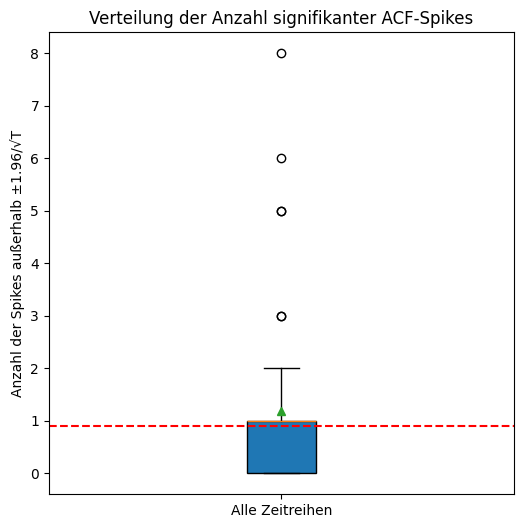

In [9]:

spikes = {}
for store in range(1, 46):
    resid = residuals_dict.get(store)
    count_spikes(resid, lags = 18)
    spikes[store] = count_spikes(resid, lags = 18)
    #print(spikes[store])


values = list(spikes.values())
print(values)
print(len(values))

plt.figure(figsize=(6, 6))
plt.boxplot(values, patch_artist=True, showmeans=True)
plt.title("Verteilung der Anzahl signifikanter ACF-Spikes")
plt.ylabel("Anzahl der Spikes außerhalb ±1.96/√T")
plt.xticks([1], ["Alle Zeitreihen"])
plt.axhline(18*0.05, color='red', linestyle='--')
plt.show()



Mittelwert Tests

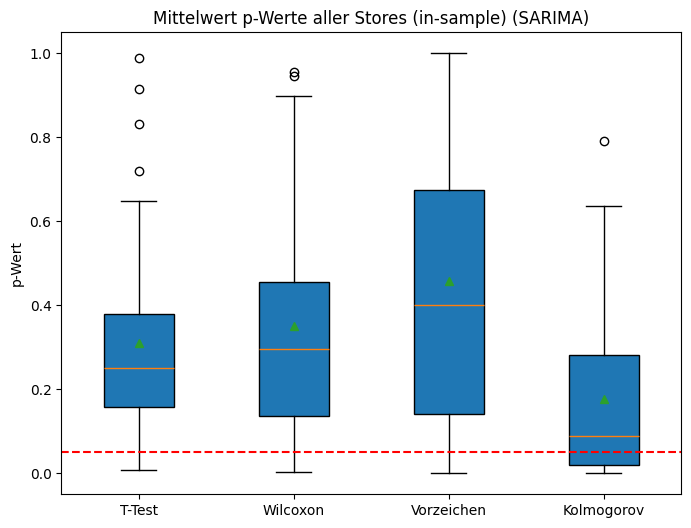

Mittelwerte: 0.31005923016400344 0.3519373957679885 0.45861497817512964 0.17724288263971655
Mediane: 0.25127257669147446 0.2966854480563992 0.4018127960698795 0.08810936860870189


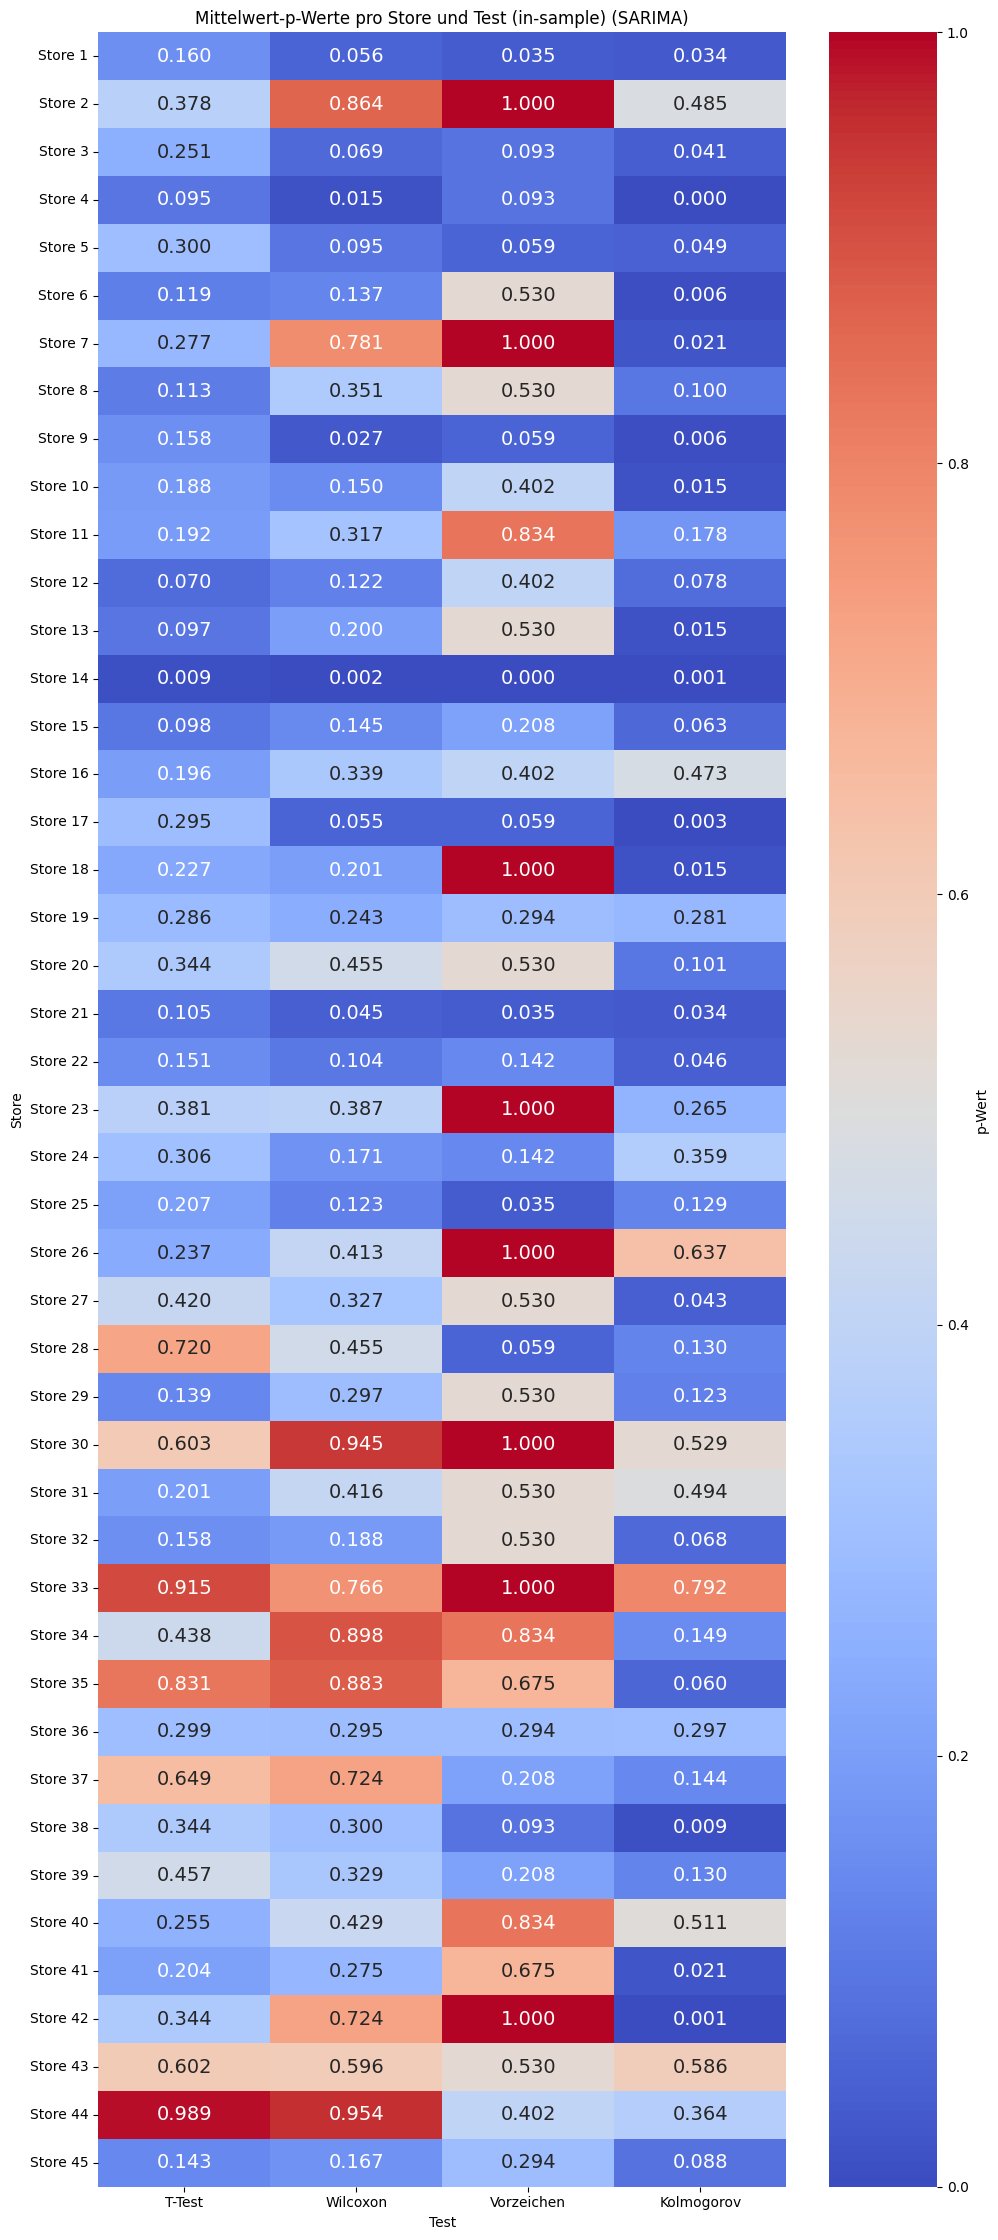

In [10]:
t_pvalues = []
w_pvalues = []
b_pvalues = []
k_pvalues = []
z_pvalues = []
s_pvalues = []

# Für jeden Store von 1 bis 45:
for store in range(1, 46):
    resid = residuals_dict.get(store)
    if resid is not None:
        # T-Test
        try:
            _, p_value = t_test(resid, False)
            t_pvalues.append(p_value)
        except Exception as e:
            print(f"Fehler beim t-Test für Store {store}: {e}")
            t_pvalues.append(np.nan)
        # Wilcoxon Test
        try:
            _, p_value = wilcoxon_test(resid, False)
            w_pvalues.append(p_value)
        except Exception as e:
            print(f"Fehler beim Wilcoxon Test für Store {store}: {e}")
            w_pvalues.append(np.nan)
        # Binomial Test
        try:
            _, _, p_value = binomial_test(resid, False)
            b_pvalues.append(p_value)
        except Exception as e:
            print(f"Fehler beim Binomial Test für Store {store}: {e}")
            b_pvalues.append(np.nan)
        # Sign Test
        try:
            _, s_value = vorzeichen_test(resid, False)
            s_pvalues.append(p_value)
        except Exception as e:
            print(f"Fehler beim Sign Test für Store {store}: {e}")
            s_pvalues.append(np.nan)
        # Kolmogorov Test
        try:
            _, p_value = kolmogorov_test(resid, False)
            k_pvalues.append(p_value)
        except Exception as e:
            print(f"Fehler beim Kolmogorov Test für Store {store}: {e}")
            k_pvalues.append(np.nan)
        # Z-Test
        try:
            _, p_value = z_test(resid, False)
            z_pvalues.append(p_value)
        except Exception as e:
            print(f"Fehler beim Z-Test für Store {store}: {e}")
            z_pvalues.append(np.nan)
    else:
        t_pvalues.append(np.nan)
        w_pvalues.append(np.nan)
        b_pvalues.append(np.nan)
        k_pvalues.append(np.nan)
        z_pvalues.append(np.nan)


pvalues = np.column_stack([t_pvalues, w_pvalues, s_pvalues, k_pvalues])


# Erstelle einen Boxplot der p-Werte
plt.figure(figsize=(8, 6))
plt.boxplot(pvalues, patch_artist=True, showmeans=True)
plt.title('Mittelwert p-Werte aller Stores (in-sample) ({})'.format(model_type))
plt.ylabel("p-Wert")
plt.xticks([1, 2, 3, 4], ["T-Test", "Wilcoxon", "Vorzeichen","Kolmogorov"])
plt.axhline(0.05, color='red', linestyle='--', label='Signifikanzniveau 0.05')
plt.show()

# Mittelwerte und Median der p-Werte
print("Mittelwerte:", np.mean(t_pvalues), np.mean(w_pvalues), np.mean(s_pvalues), np.mean(k_pvalues))
print("Mediane:", np.median(t_pvalues), np.median(w_pvalues), np.median(s_pvalues), np.median(k_pvalues))


# Heatmap
store_names = [f"Store {i+1}" for i in range(pvalues.shape[0])]
columns = ["T-Test", "Wilcoxon", "Vorzeichen", "Kolmogorov"]
df_pvalues = pd.DataFrame(pvalues, index=store_names, columns=columns)
plt.figure(figsize=(10, len(store_names) * 0.5))  # Dynamische Höhe
sns.heatmap(df_pvalues, annot=True, fmt=".3f", annot_kws={"size": 14}, cmap="coolwarm", cbar_kws={'label': 'p-Wert'}, vmin=0, vmax=1)
plt.title('Mittelwert-p-Werte pro Store und Test (in-sample) ({})'.format(model_type))
plt.xlabel("Test")
plt.ylabel("Store")
plt.tight_layout()
plt.show()

SMAPE

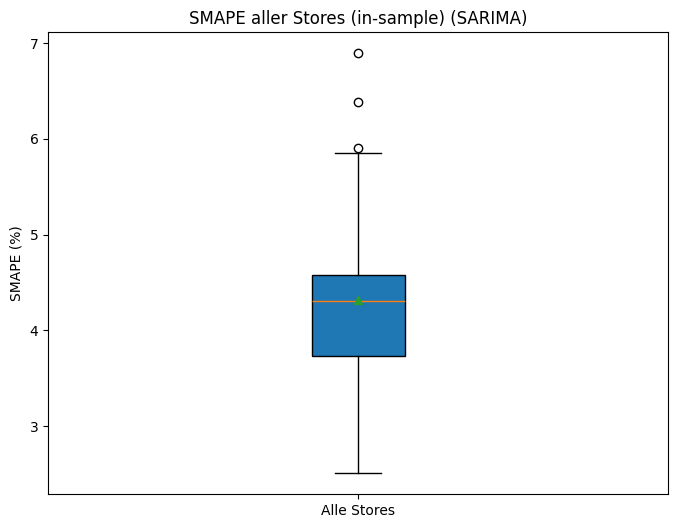

Mittelwert: 4.315493773175929 %
Median: 4.302500501182228 %
[4.469632235221411, 3.176272310123207, 4.291082517503087, 3.9828511676016904, 4.519025310090013, 3.7323741679464715, 5.323181825802672, 3.002659482060509, 4.554117235826121, 4.09511973648754, 4.040031066646914, 3.4460362801885527, 3.660100622585926, 5.848313250573156, 4.70306355080234, 4.302500501182228, 4.724387460532632, 6.383467812849172, 3.989056629152712, 4.391025198553976, 4.41801923502494, 4.794238369742752, 5.90027612118618, 4.37127201604985, 4.215248774178977, 3.653699415985365, 4.542744999905821, 5.407638657362212, 5.447268045394512, 3.1781949245832863, 2.50680255380503, 3.07285286864378, 3.943025629388734, 2.712187906391946, 6.894021578593213, 4.280342346383272, 3.208829572732128, 5.401058107621064, 4.389663458646726, 4.241799694938014, 4.446686710886647, 4.034595537115992, 4.58028873520447, 3.4228816398531157, 4.499284531568434]


In [11]:
df = pd.read_csv('Walmart_Sales.csv', parse_dates=['Date'], dayfirst=True)
df.columns = df.columns.str.lower()

smape_stats = []

for store_id in range(1, 46):
    # fitted_values holen und in Serie umwandeln
    fitted = fitted_values_dict.get(store_id)
    if fitted is None:
        smape_stats.append(np.nan)
        continue

    # Sales-Daten für den Store
    store_df = df[df['store'] == store_id].copy()
    store_df.set_index('date', inplace=True)
    sales = store_df['weekly_sales'].asfreq('W-FRI')

    # fitted in Serie mit gleichem Index überführen
    y_pred = pd.Series(fitted, index=sales.index, name='pred')
    y_true = sales.rename('true')

    # nur Wochen, wo beide Werte vorliegen
    mask = y_pred.notna() & y_true.notna()

    y_pred_clean = y_pred[mask]
    y_true_clean = y_true[mask]

    # SMAPE
    numerator   = np.abs(y_pred_clean - y_true_clean)
    denominator = (np.abs(y_pred_clean) + np.abs(y_true_clean)) / 2

    smape_array = np.where(denominator == 0, 0, numerator / denominator)
    smape = np.nanmean(smape_array) * 100

    #print(len(smape_array))
    smape_stats.append(smape)


# Boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(smape_stats, patch_artist=True, showmeans=True)
plt.title(f'SMAPE aller Stores (in-sample) ({model_type})')
plt.ylabel("SMAPE (%)")
plt.xticks([1], ["Alle Stores"])
plt.show()

# Mittelwerte und Median der SMAPE Werte
print("Mittelwert:",np.mean(smape_stats), "%")
print("Median:",np.median(smape_stats), "%")
print(smape_stats)

SMAPE vs. Autokorrelation p-Werte

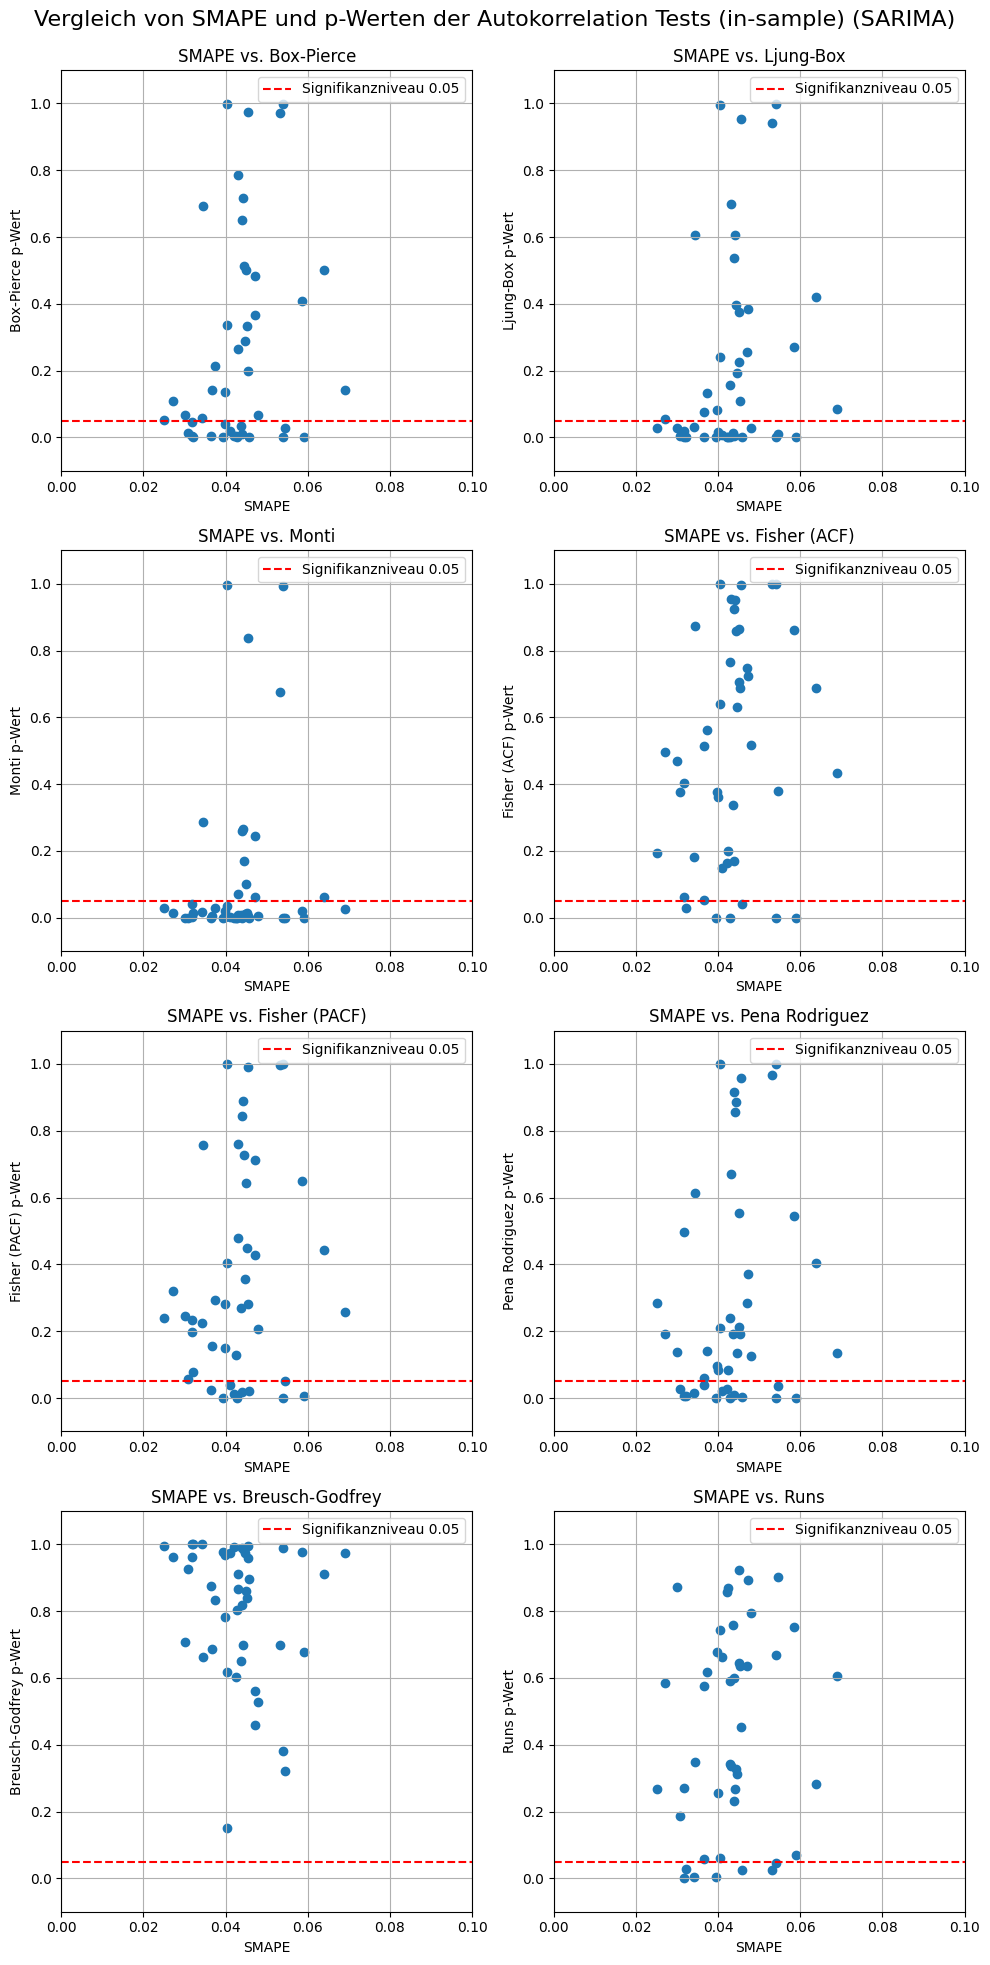

In [12]:
fig, axes = plt.subplots(4, 2, figsize=(10, 20))  # 2 Zeilen, 4 Spalten

smape_dec = np.asarray(smape_stats) / 100
p_values_list = [bp_pvalues, lb_pvalues, m_pvalues, f_pvalues, f2_pvalues, pr2_pvalues, bg_pvalues, rt_pvalues]
test_names = ["Box-Pierce", "Ljung-Box", "Monti", "Fisher (ACF)", "Fisher (PACF)", "Pena Rodriguez", "Breusch-Godfrey", "Runs"]

for i, ax in enumerate(axes.flat):
    ax.scatter(smape_dec, p_values_list[i])
    ax.set_xlabel('SMAPE')
    ax.set_ylabel(f'{test_names[i]} p-Wert')
    ax.set_title(f'SMAPE vs. {test_names[i]}')
    ax.grid(True)
    ax.axhline(0.05, color='red', linestyle='--', label='Signifikanzniveau 0.05')
    ax.legend()
    ax.set_xlim(0, 0.1)
    ax.set_ylim(-0.1, 1.1)


fig.suptitle('Vergleich von SMAPE und p-Werten der Autokorrelation Tests (in-sample) ({})'.format(model_type), fontsize=16)
plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

SMAPE vs Mittelwert p-Werte

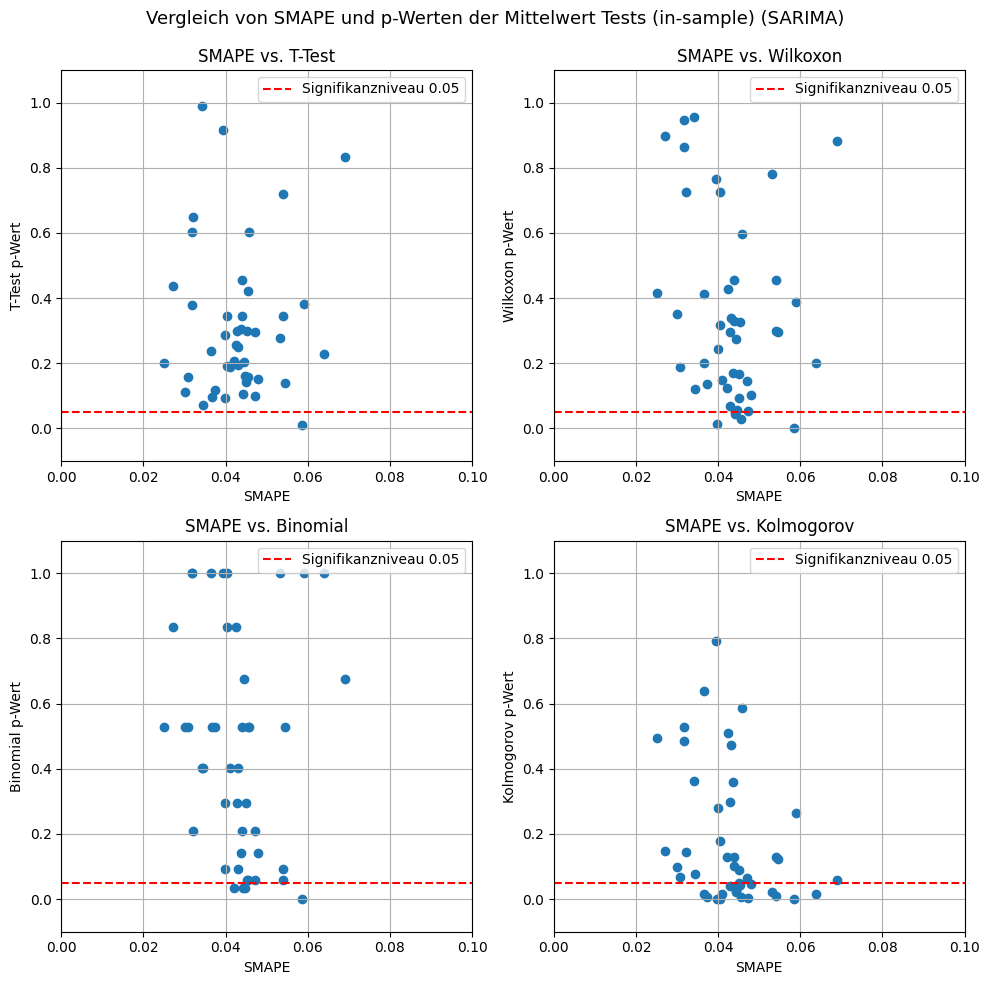

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

smape_dec = np.asarray(smape_stats) / 100
p_values_list = [t_pvalues, w_pvalues, b_pvalues, k_pvalues]
test_names = ["T-Test", "Wilkoxon", "Binomial", "Kolmogorov"]

for i, ax in enumerate(axes.flat):
    ax.scatter(smape_dec, p_values_list[i])
    ax.set_xlabel('SMAPE')
    ax.set_ylabel(f'{test_names[i]} p-Wert')
    ax.set_title(f'SMAPE vs. {test_names[i]}')
    ax.grid(True)
    ax.axhline(0.05, color='red', linestyle='--', label='Signifikanzniveau 0.05')
    ax.legend()
    ax.set_xlim(0, 0.1)
    ax.set_ylim(-0.1, 1.1)


fig.suptitle('Vergleich von SMAPE und p-Werten der Mittelwert Tests (in-sample) ({})'.format(model_type), fontsize=13)
plt.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()

Kreuzvalidierung

In [14]:
if model_type == 'SARIMA':
    cvs = cv_SARIMA_all_stores('Walmart_Sales.csv', whichorder = 5)
if model_type == 'Naive':
    cvs = cv_naive_all_stores('Walmart_Sales.csv')

Verarbeite Store 1 (Datenlänge: 143)...
Cross-Validation RMSE: 112385.86388991041
Verarbeite Store 2 (Datenlänge: 143)...


KeyboardInterrupt: 

Errors

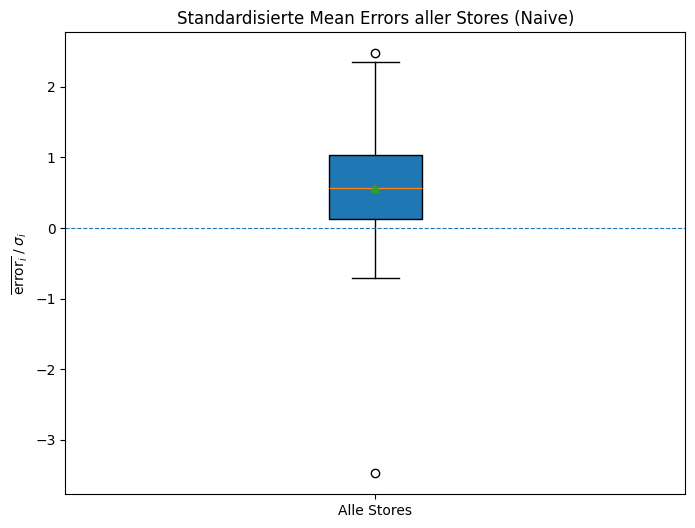

Mittelwert:  0.5672113722145641
Median:  0.5696480386242804


In [ ]:
errors = cvs.groupby('store')['error']

mean_err = errors.mean()
std_err  = errors.std(ddof=0)
norm_bias = mean_err / std_err
norm_bias.replace([np.inf, -np.inf], np.nan, inplace=True)
norm_bias = norm_bias.dropna()  


plt.figure(figsize=(8, 6))
plt.boxplot(norm_bias.values, patch_artist=True, showmeans=True)
plt.title('Standardisierte Mean Errors aller Stores ({})'.format(model_type))
plt.ylabel(r'$\overline{\mathrm{error}_i}\; / \;\sigma_i$')
plt.xticks([1], ['Alle Stores'])
plt.axhline(0, ls='--', lw=0.8)
plt.show()

print("Mittelwert: ", np.mean(norm_bias.values))
print("Median: ", np.median(norm_bias.values))


In [ ]:
errors = cvs[cvs['store'] == 1]['error']
#print(errors)
print(len(errors))

58


Korrelations Test

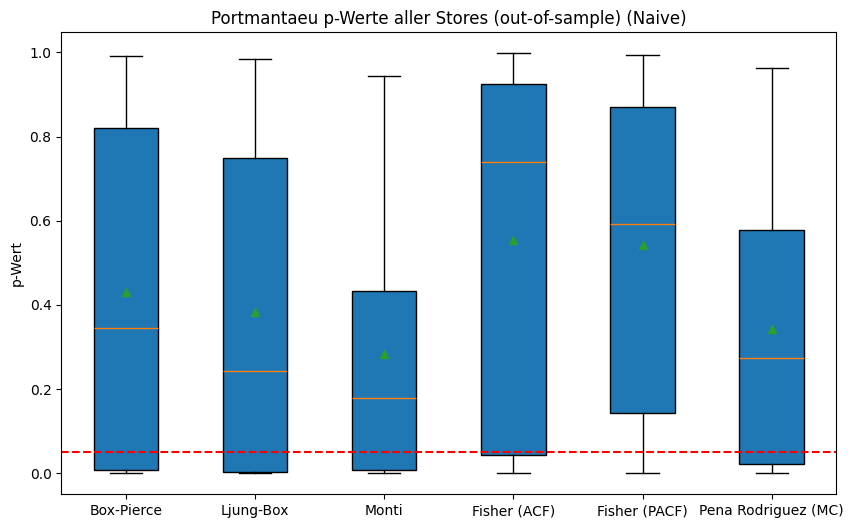

Mittelwerte: 0.4304318477155982 0.38347712923184624 0.28398852343887004 0.5543777103560628 0.5414673163220777 0.3424131424131424
Mediane: 0.34473558390919584 0.24298446808290677 0.1788042502141033 0.7395503585503289 0.5932655549924394 0.2727272727272727


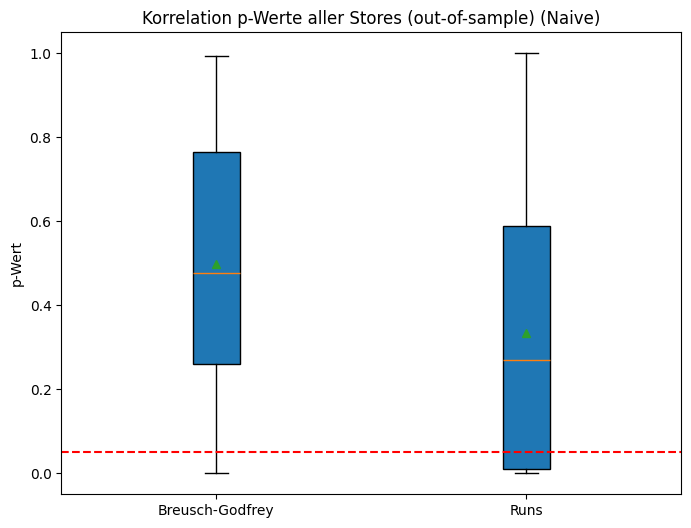

Mittelwerte: 0.4983663678860326 0.3351471920187083
Mediane: 0.4762016540086058 0.2706065524419111


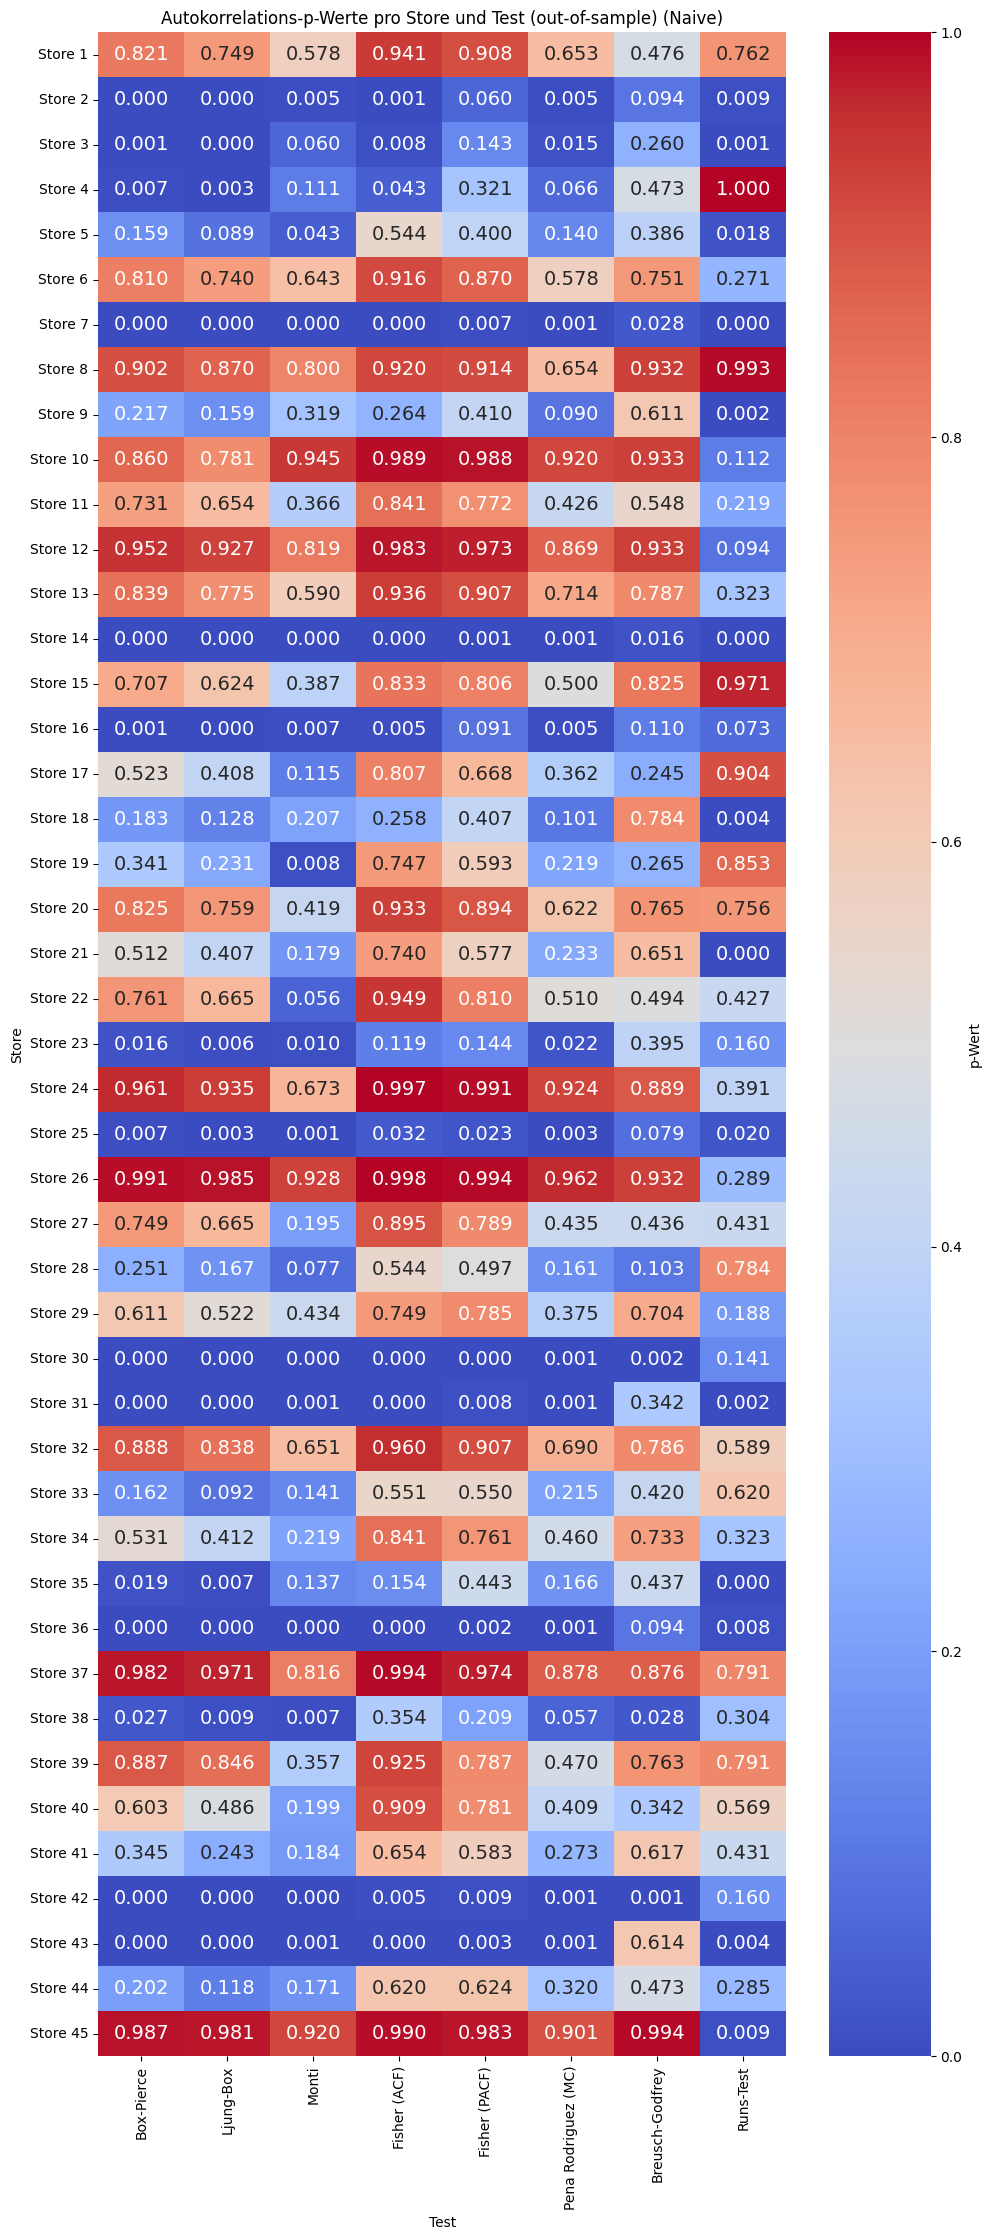

In [ ]:
bp_pvalues = []
lb_pvalues = []
bg_pvalues = []
rt_pvalues = []
m_pvalues = []
f_pvalues = []
f2_pvalues = []
pr2_pvalues = []


# Für jeden Store von 1 bis 45:
for store in range(1, 46):
    errors = cvs[cvs['store'] == store]['error']
    
    sales = df[df['store'] == store].copy() #Zeitreihe für den Store
    sales.set_index('date', inplace=True)
    sales = sales['weekly_sales']
    sales = sales.asfreq('W-FRI')

    if errors is not None:
        # Box-Pierce Test
        try:
            _, p_value = box_pierce_test(residuals = errors, store_num = store, model = model_type, sample = "OOS", lags = 10, print_results=False)
            bp_pvalues.append(p_value)
        except Exception as e:
            print(f"Fehler beim Box-Pierce Test für Store {store}: {e}")
            bp_pvalues.append(np.nan)
        # Ljung-Box Test
        try:
            _, p_value = ljung_box_test(residuals = errors, store_num = store, model = model_type, sample = "OOS", lags = 10, print_results=False)
            lb_pvalues.append(p_value)
        except Exception as e:
            print(f"Fehler beim Ljung-Box Test für Store {store}: {e}")
            lb_pvalues.append(np.nan)
        # Breusch-Godfrey Test
        try:
            _, p_value = breusch_godfrey_oos(residuals=errors, lags = 10)
            bg_pvalues.append(p_value)
        except Exception as e:
            print(f"Fehler beim Breusch-Godfrey Test für Store {store}: {e}")
            bg_pvalues.append(np.nan)
        # Monti Test
        try:
            sarima_params  = optimal_orders_5.get(str(store))
            order = tuple(sarima_params["order"])
            _, p_value = monti_test(residuals = errors, store_num = store, model = model_type, m = 9, print_results = False)
            m_pvalues.append(p_value)
        except Exception as e:
            print(f"Fehler beim Monti Test für Store {store}: {e}")
            m_pvalues.append(np.nan)
        # Fisher Test (ACF)
        try:
            sarima_params  = optimal_orders_5.get(str(store))
            order = tuple(sarima_params["order"])
            _, p_value = fisher_test(residuals = errors, store_num = store, model = model_type, version = "acf", m = 9, print_results = False)
            f_pvalues.append(p_value)
        except Exception as e:
            print(f"Fehler beim Fisher Test für Store {store}: {e}")
            f_pvalues.append(np.nan)
        # Fisher Test (PACF)
        try:
            sarima_params  = optimal_orders_5.get(str(store))
            order = tuple(sarima_params["order"])
            _, p_value = fisher_test(residuals = errors, store_num = store, model = model_type, version = "pacf", m = 9, print_results = False)
            f2_pvalues.append(p_value)
        except Exception as e:
            print(f"Fehler beim Fisher Test für Store {store}: {e}")
            f2_pvalues.append(np.nan)
        # Pena Rodriguez Test (Monte Carlo)
        try:
            _, p_value = pena_rodriguez_test_mc(residuals = errors, m = 9, print_results= False)
            pr2_pvalues.append(p_value)

        except Exception as e:
            print(f"Fehler beim Pena Rodriguez Test für Store {store}: {e}")
            pr2_pvalues.append(np.nan)
        # Runs Test
        try:
            _, p_value = run_test(residuals = errors, print_results=False)
            rt_pvalues.append(p_value)
        except Exception as e:
            print(f"Fehler beim Runs Test für Store {store}: {e}")
            rt_pvalues.append(np.nan)
    else:
        bp_pvalues.append(np.nan)
        lb_pvalues.append(np.nan)
        bg_pvalues.append(np.nan)
        rt_pvalues.append(np.nan)
        m_pvalues.append(np.nan)
        f_pvalues.append(np.nan)
        f2_pvalues.append(np.nan)
        pr2_pvalues.append(np.nan)


pvalues = np.column_stack([bp_pvalues, lb_pvalues, m_pvalues, f_pvalues, f2_pvalues, pr2_pvalues, bg_pvalues, rt_pvalues])
pvalues_portmantaeu = np.column_stack([bp_pvalues, lb_pvalues, m_pvalues, f_pvalues, f2_pvalues, pr2_pvalues])
pvalues_other = np.column_stack([bg_pvalues, rt_pvalues])


# Boxplot Portmanteau
plt.figure(figsize=(10, 6))
plt.boxplot(pvalues_portmantaeu, patch_artist=True, showmeans=True)
plt.title('Portmantaeu p-Werte aller Stores (out-of-sample) ({})'.format(model_type))
plt.ylabel("p-Wert")
plt.xticks([1, 2, 3, 4, 5, 6], ["Box-Pierce", "Ljung-Box",  "Monti", "Fisher (ACF)", "Fisher (PACF)", "Pena Rodriguez (MC)"])
plt.axhline(0.05, color='red', linestyle='--', label='Signifikanzniveau 0.05')
plt.show()

# Mittelwerte und Median der p-Werte
print("Mittelwerte:", np.mean(bp_pvalues), np.mean(lb_pvalues),  np.mean(m_pvalues), np.mean(f_pvalues), np.mean(f2_pvalues), np.mean(pr2_pvalues))
print("Mediane:", np.median(bp_pvalues), np.median(lb_pvalues),  np.median(m_pvalues), np.median(f_pvalues), np.median(f2_pvalues), np.median(pr2_pvalues))


# Boxplot Breusch-Godfrey und Runs-Test
plt.figure(figsize=(8, 6))
plt.boxplot(pvalues_other, patch_artist=True, showmeans=True)
plt.title('Korrelation p-Werte aller Stores (out-of-sample) ({})'.format(model_type))
plt.ylabel("p-Wert")
plt.xticks([1, 2], ["Breusch-Godfrey", "Runs"])
plt.axhline(0.05, color='red', linestyle='--', label='Signifikanzniveau 0.05')
plt.show()

# Mittelwerte und Median der p-Werte
print("Mittelwerte:", np.mean(bg_pvalues), np.mean(rt_pvalues))
print("Mediane:", np.median(bg_pvalues), np.median(rt_pvalues))


# Heatmap
store_names = [f"Store {i+1}" for i in range(pvalues.shape[0])]
columns = ["Box-Pierce", "Ljung-Box",  "Monti", "Fisher (ACF)", "Fisher (PACF)", "Pena Rodriguez (MC)", "Breusch-Godfrey", "Runs-Test"]
df_pvalues = pd.DataFrame(pvalues, index=store_names, columns=columns)
plt.figure(figsize=(10, len(store_names) * 0.5))  # Dynamische Höhe
sns.heatmap(df_pvalues, annot=True, fmt=".3f", annot_kws={"size": 14}, cmap="coolwarm", cbar_kws={'label': 'p-Wert'}, vmin=0, vmax=1)
plt.title('Autokorrelations-p-Werte pro Store und Test (out-of-sample) ({})'.format(model_type))
plt.xlabel("Test")
plt.ylabel("Store")
plt.tight_layout()
plt.show()


Durbin Watson

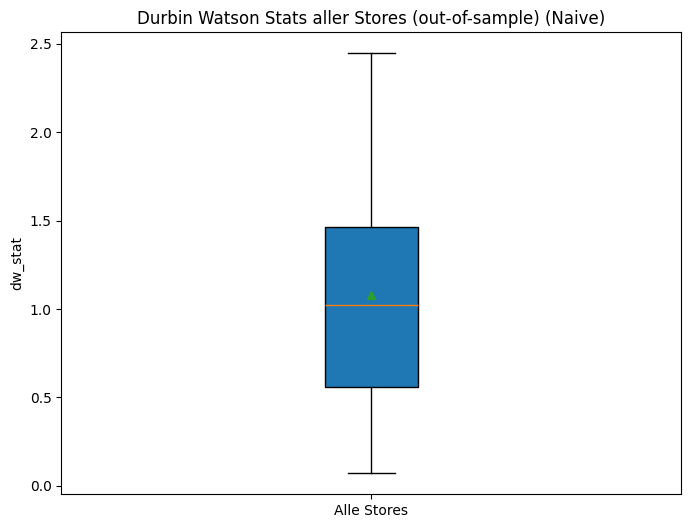

Mittelwert: 1.0788103891018517
Median: 1.024739746960642


In [ ]:
dw_stats = []

# Für jeden Store von 1 bis 45:
for store in range(1, 46):
    error = cvs[cvs['store'] == store]['error']
    if resid is not None:
        try:
            dw_stat = durbin_watson_test(error, False)
            dw_stats.append(dw_stat)
        except Exception as e:
            print(f"Fehler beim Durbin Watson Test für Store {store}: {e}")
            dw_stats.append(np.nan)
    else:
        dw_stats.append(np.nan)

# Erstelle einen Boxplot der p-Werte
plt.figure(figsize=(8, 6))
plt.boxplot(dw_stats, patch_artist=True, showmeans=True)
plt.title('Durbin Watson Stats aller Stores (out-of-sample) ({})'.format(model_type))
plt.ylabel("dw_stat")
plt.xticks([1], ["Alle Stores"])
plt.show()

print("Mittelwert:", np.mean(dw_stats))
print("Median:", np.median(dw_stats))


Mittelwert Tests

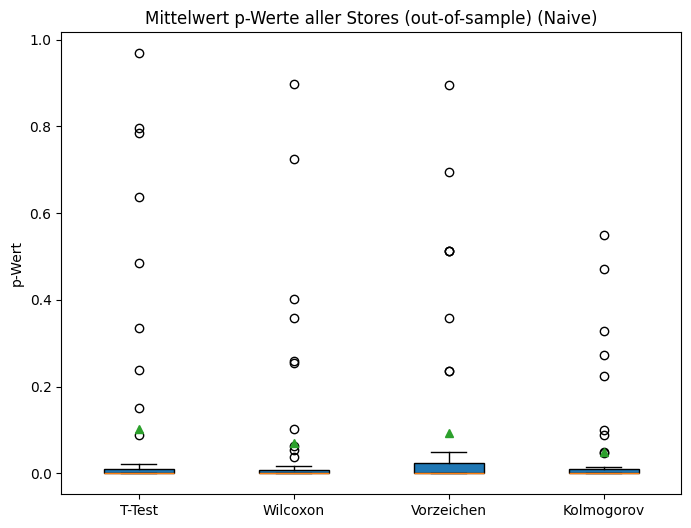

Mittelwerte: 0.1012736734662184 0.07082620723626222 0.09174923735287488 0.04839594110975701
Mediane: 1.0068428804593193e-05 8.66820339270204e-06 3.011590962911926e-05 2.5422285445180095e-05


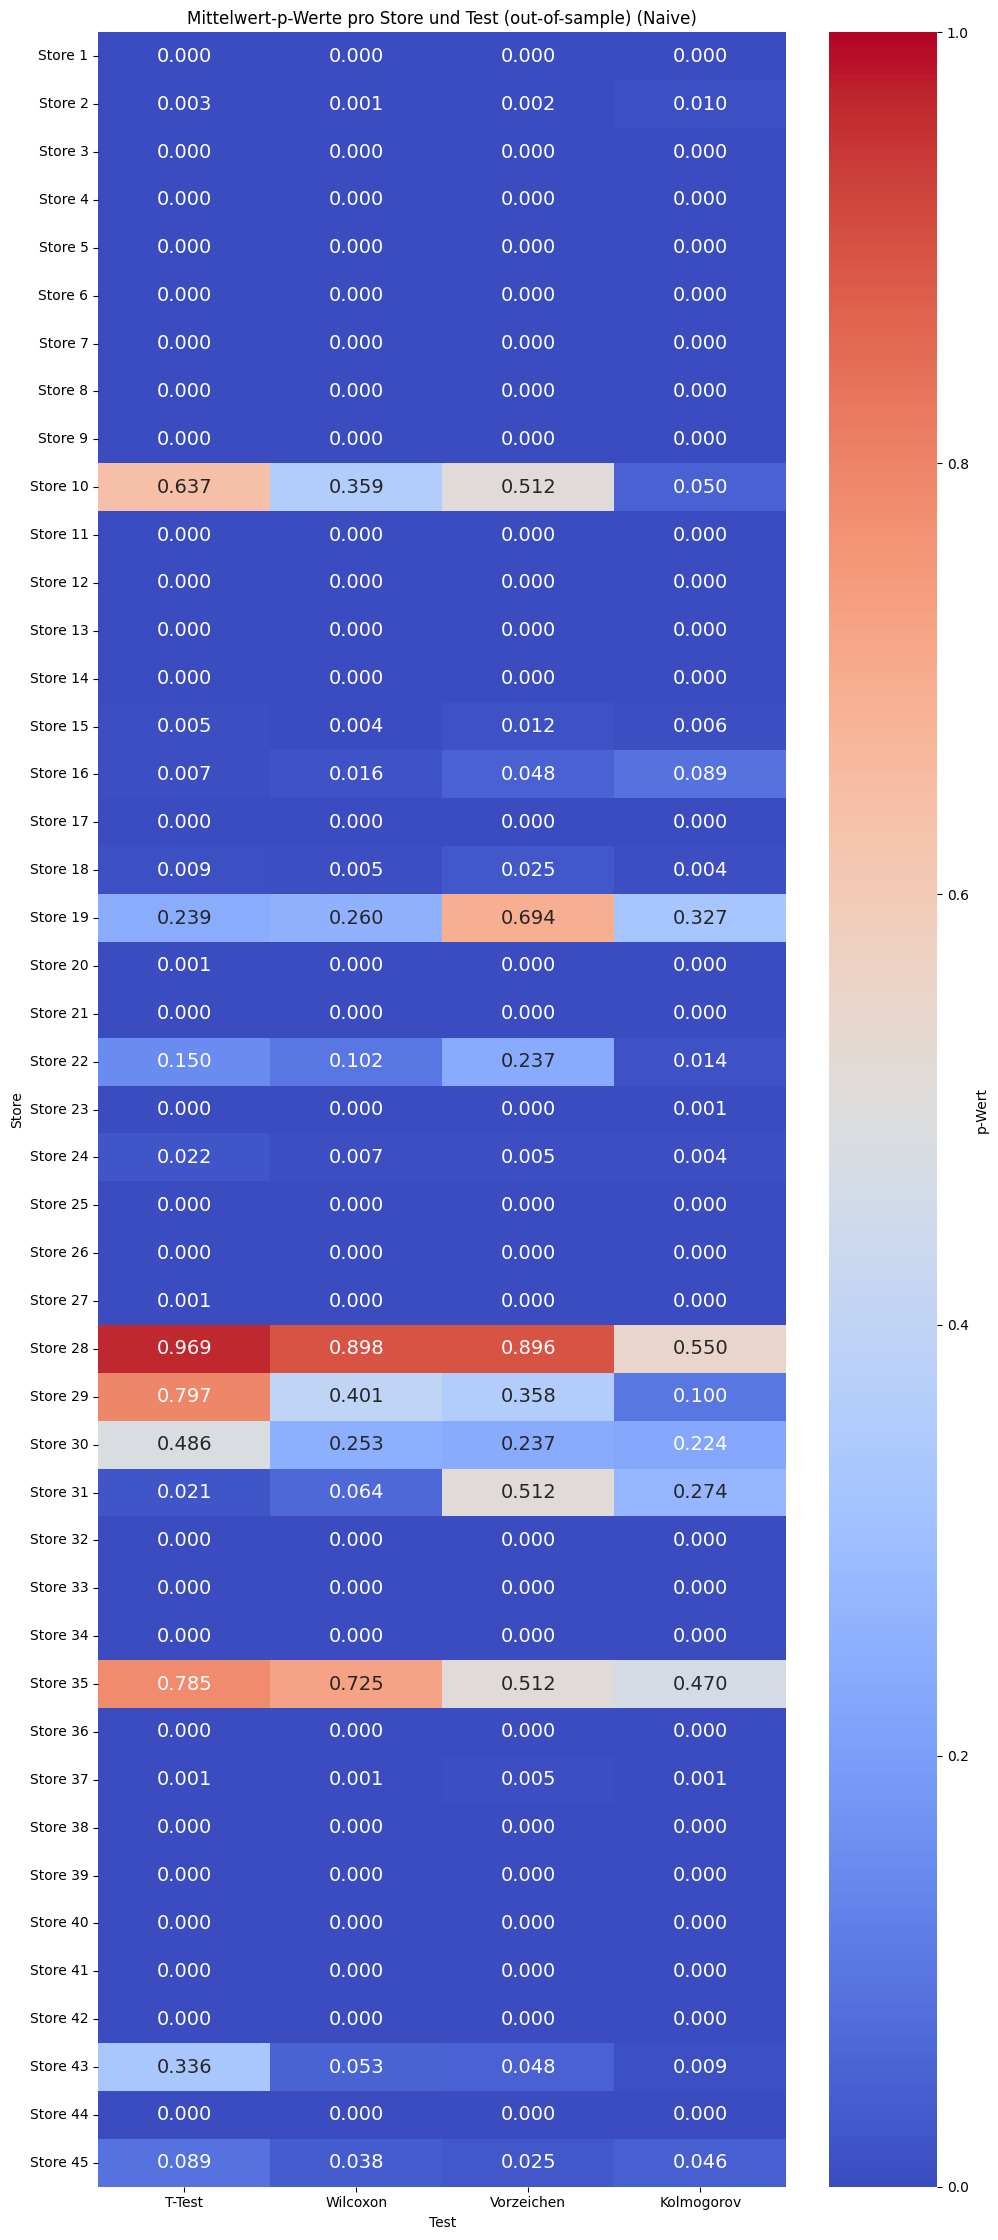

In [ ]:
t_pvalues = []
w_pvalues = []
b_pvalues = []
k_pvalues = []
z_pvalues = []
s_pvalues = []

# Für jeden Store von 1 bis 45:
for store in range(1, 46):
    errors = cvs[cvs['store'] == store]['error']
    if resid is not None:
        # T-Test
        try:
            _, p_value = t_test(errors, False)
            t_pvalues.append(p_value)
        except Exception as e:
            print(f"Fehler beim t-Test für Store {store}: {e}")
            t_pvalues.append(np.nan)
        # Wilcoxon Test
        try:
            _, p_value = wilcoxon_test(errors, False)
            w_pvalues.append(p_value)
        except Exception as e:
            print(f"Fehler beim Wilcoxon Test für Store {store}: {e}")
            w_pvalues.append(np.nan)
        # Binomial Test
        try:
            _, _, p_value = binomial_test(errors, False)
            b_pvalues.append(p_value)
        except Exception as e:
            print(f"Fehler beim Binomial Test für Store {store}: {e}")
            b_pvalues.append(np.nan)
        # Sign Test
        try:
            _, s_value = vorzeichen_test(errors, False)
            s_pvalues.append(p_value)
        except Exception as e:
            print(f"Fehler beim Sign Test für Store {store}: {e}")
            s_pvalues.append(np.nan)
        # Kolmogorov Test
        try:
            _, p_value = kolmogorov_test(errors, False)
            k_pvalues.append(p_value)
        except Exception as e:
            print(f"Fehler beim Kolmogorov Test für Store {store}: {e}")
            k_pvalues.append(np.nan)
        # Z-Test
        try:
            _, p_value = z_test(errors, False)
            z_pvalues.append(p_value)
        except Exception as e:
            print(f"Fehler beim Z-Test für Store {store}: {e}")
            z_pvalues.append(np.nan)
    else:
        t_pvalues.append(np.nan)
        w_pvalues.append(np.nan)
        b_pvalues.append(np.nan)
        k_pvalues.append(np.nan)
        z_pvalues.append(np.nan)


pvalues = np.column_stack([t_pvalues, w_pvalues, s_pvalues, k_pvalues])


# Erstelle einen Boxplot der p-Werte
plt.figure(figsize=(8, 6))
plt.boxplot(pvalues, patch_artist=True, showmeans=True)
plt.title('Mittelwert p-Werte aller Stores (out-of-sample) ({})'.format(model_type))
plt.ylabel("p-Wert")
plt.xticks([1, 2, 3, 4], ["T-Test", "Wilcoxon", "Vorzeichen", "Kolmogorov"])
plt.show()

# Mittelwerte und Median der p-Werte
print("Mittelwerte:", np.mean(t_pvalues), np.mean(w_pvalues), np.mean(s_pvalues),np.mean(k_pvalues))
print("Mediane:", np.median(t_pvalues), np.median(w_pvalues), np.median(s_pvalues), np.median(k_pvalues))

# Heatmap
store_names = [f"Store {i+1}" for i in range(pvalues.shape[0])]
columns = ["T-Test", "Wilcoxon", "Vorzeichen", "Kolmogorov"]
df_pvalues = pd.DataFrame(pvalues, index=store_names, columns=columns)
plt.figure(figsize=(10, len(store_names) * 0.5))  # Dynamische Höhe
sns.heatmap(df_pvalues, annot=True, fmt=".3f", annot_kws={"size": 14}, cmap="coolwarm", cbar_kws={'label': 'p-Wert'}, vmin=0, vmax=1)
plt.title('Mittelwert-p-Werte pro Store und Test (out-of-sample) ({})'.format(model_type))
plt.xlabel("Test")
plt.ylabel("Store")
plt.tight_layout()
plt.show()


SMAPE

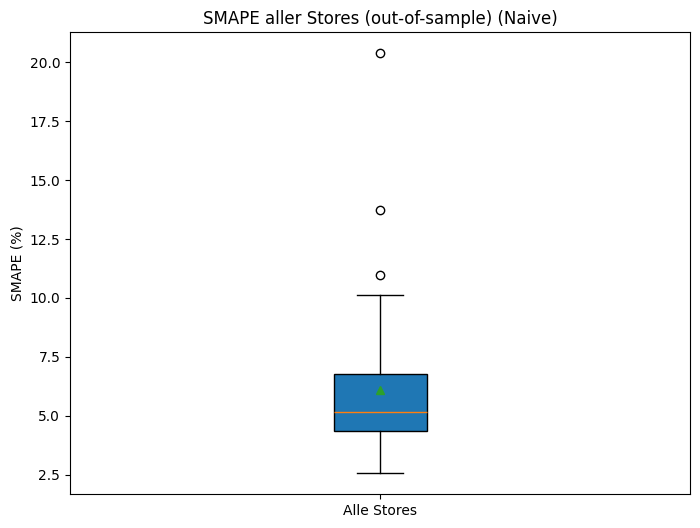

Mittelwert: 6.088989717718031 %
Median: 5.150058108888672 %


In [ ]:
smape_stats = []

# Für jeden Store von 1 bis 45:
for store in range(1, 46):
    forecast_values = cvs[cvs['store'] == store]['forecast']
    actual_values = cvs[cvs['store'] == store]['actual']

    if len(forecast_values) > 0:
        # SMAPI Test
    
        numerator = np.abs(forecast_values - actual_values)
        denominator = (np.abs(forecast_values) + np.abs(actual_values)) / 2
        smape = np.where(denominator == 0, 0, numerator / denominator)
        smape = np.mean(smape) * 100
        try:
            smape_stats.append(smape)
        except Exception as e:
            print(f"Fehler beim SMAPI Test für Store {store}: {e}")
            smape_stats.append(np.nan)
    else:
        smape_stats.append(np.nan)

plt.figure(figsize=(8, 6))
plt.boxplot(smape_stats, patch_artist=True, showmeans=True)
plt.title('SMAPE aller Stores (out-of-sample) ({})'.format(model_type))
plt.ylabel("SMAPE (%)")
plt.xticks([1], ["Alle Stores"])
plt.show()

# Mittelwerte und Median der SMAPE Werte
print("Mittelwert:", np.mean(smape_stats), "%")
print("Median:", np.median(smape_stats), "%")

SMAPE vs. Autokorrelation p-Werte

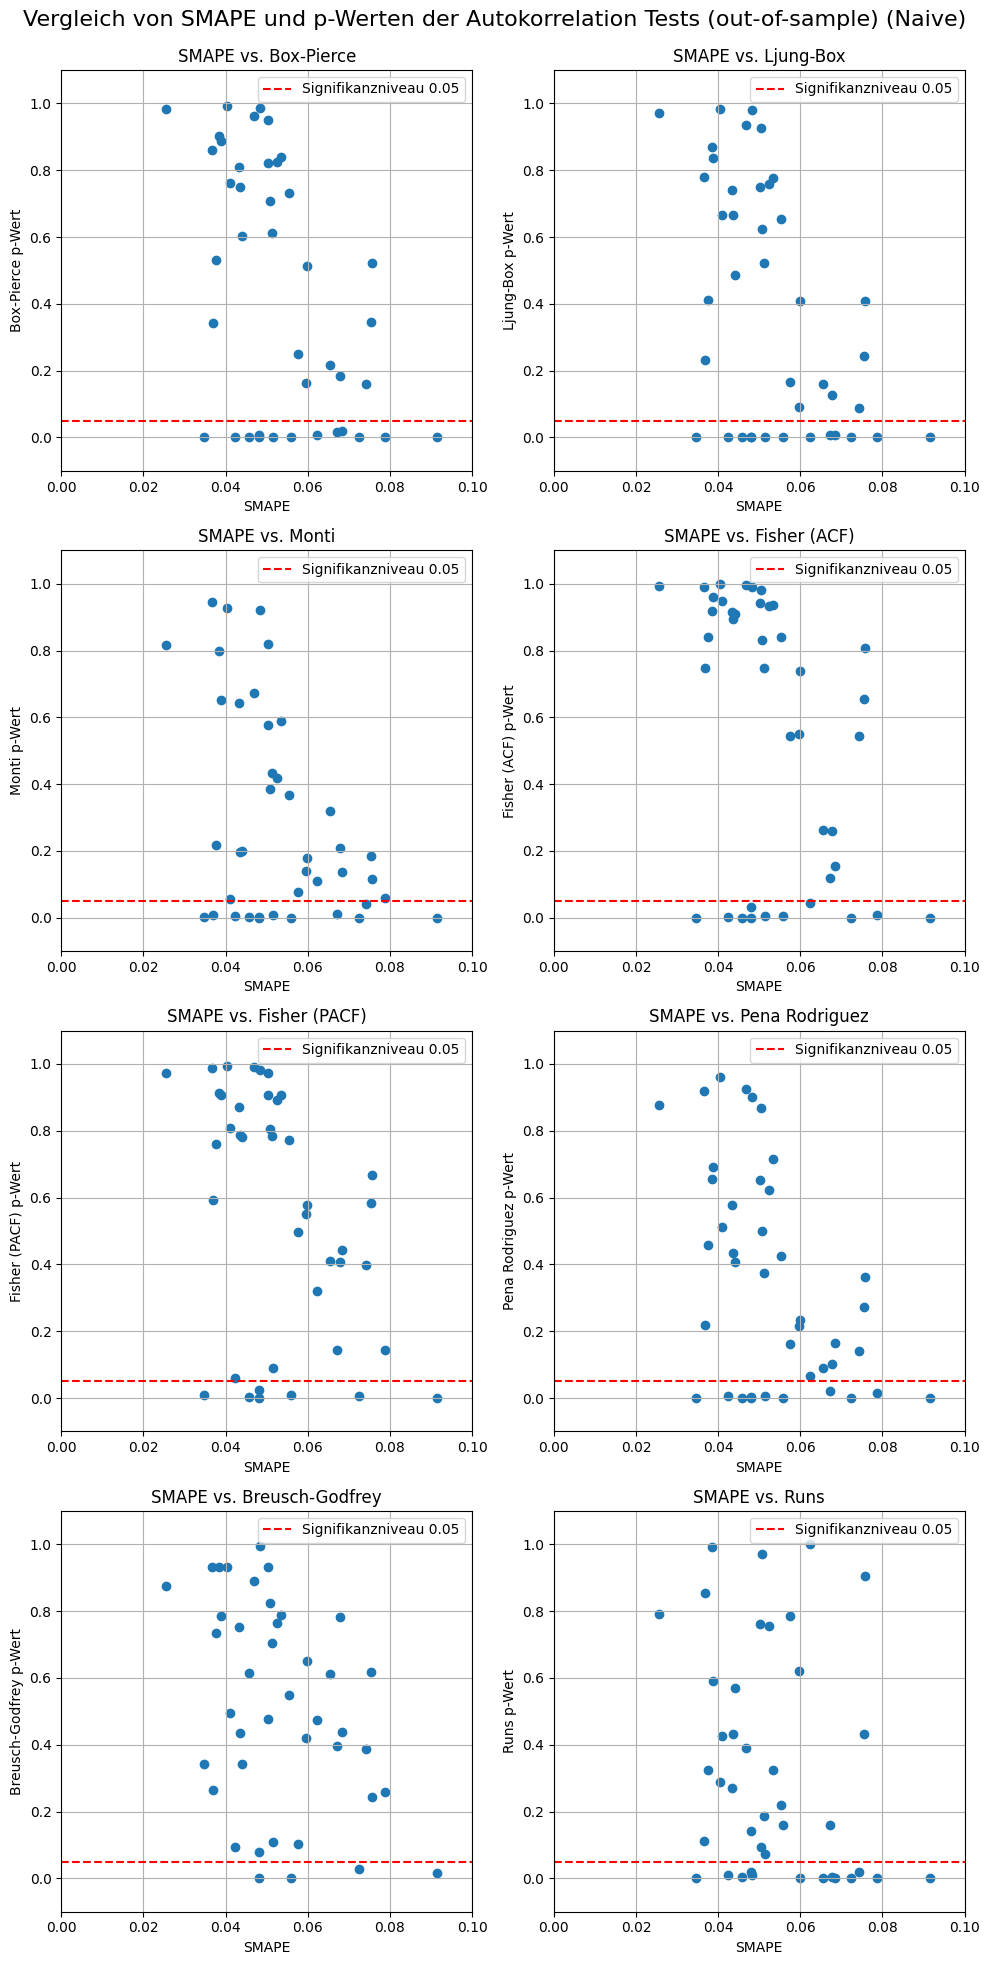

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(10, 20))

smape_dec = np.asarray(smape_stats) / 100
p_values_list = [bp_pvalues, lb_pvalues, m_pvalues, f_pvalues, f2_pvalues, pr2_pvalues, bg_pvalues, rt_pvalues]
test_names = ["Box-Pierce", "Ljung-Box", "Monti", "Fisher (ACF)", "Fisher (PACF)", "Pena Rodriguez", "Breusch-Godfrey", "Runs"]

for i, ax in enumerate(axes.flat):
    ax.scatter(smape_dec, p_values_list[i])
    ax.set_xlabel('SMAPE')
    ax.set_ylabel(f'{test_names[i]} p-Wert')
    ax.set_title(f'SMAPE vs. {test_names[i]}')
    ax.grid(True)
    ax.axhline(0.05, color='red', linestyle='--', label='Signifikanzniveau 0.05')
    ax.legend()
    ax.set_xlim(0, 0.1)
    ax.set_ylim(-0.1, 1.1)


fig.suptitle('Vergleich von SMAPE und p-Werten der Autokorrelation Tests (out-of-sample) ({})'.format(model_type), fontsize=16)
plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

SMAPE vs. Mittelwert p-Werte

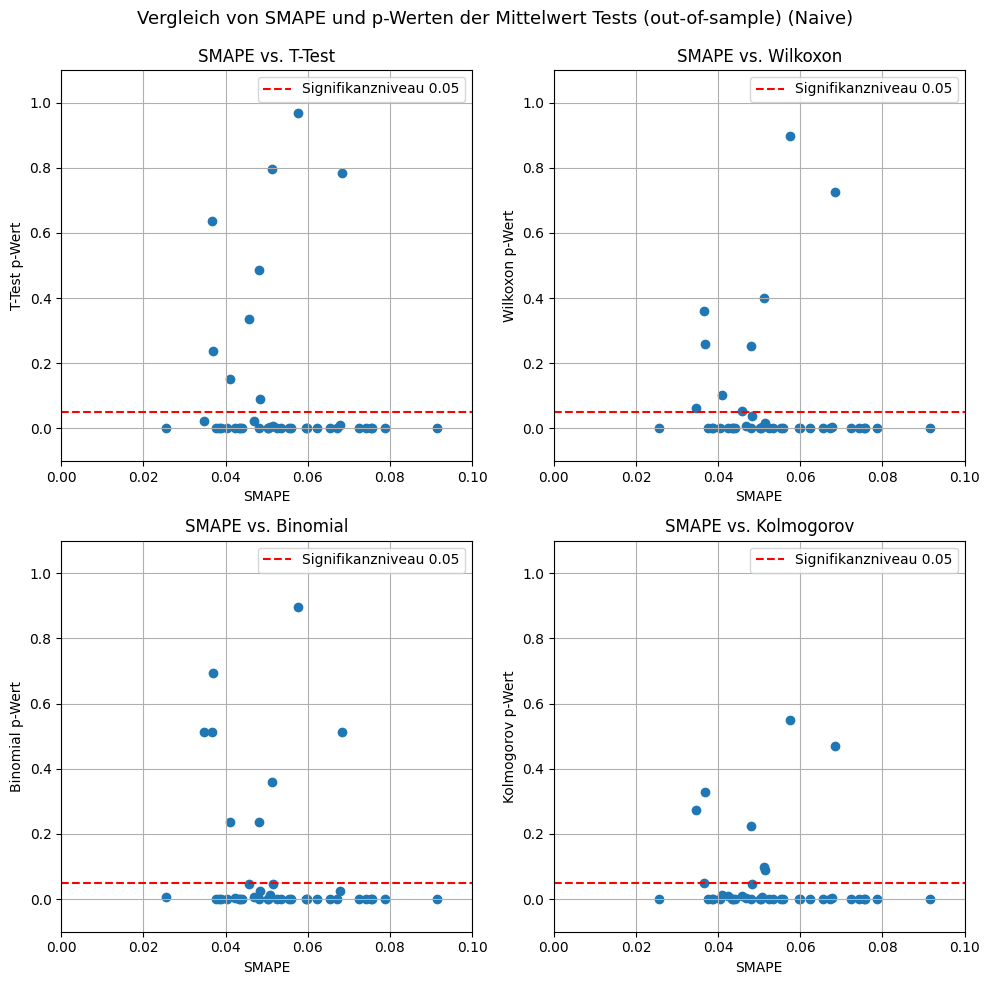

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

smape_dec = np.asarray(smape_stats) / 100
p_values_list = [t_pvalues, w_pvalues, b_pvalues, k_pvalues]
test_names = ["T-Test", "Wilkoxon", "Binomial", "Kolmogorov"]

for i, ax in enumerate(axes.flat):
    ax.scatter(smape_dec, p_values_list[i])
    ax.set_xlabel('SMAPE')
    ax.set_ylabel(f'{test_names[i]} p-Wert')
    ax.set_title(f'SMAPE vs. {test_names[i]}')
    ax.grid(True)
    ax.axhline(0.05, color='red', linestyle='--', label='Signifikanzniveau 0.05')
    ax.legend()
    ax.set_xlim(0, 0.1)
    ax.set_ylim(-0.1, 1.1)


fig.suptitle('Vergleich von SMAPE und p-Werten der Mittelwert Tests (out-of-sample) ({})'.format(model_type), fontsize=13)
plt.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()